In [8]:
import os
os.chdir('/kaggle/input/myfunctions')
from functions import *

In [9]:
!ls

functions.py


In [10]:
import pandas as pd
import numpy as np
import pickle
from functions import *
os.chdir('/kaggle/input/mydatasets2')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xg
from tqdm import tqdm

In [11]:
def models_predict(model_list, x_values):
  preds = np.zeros((x_values.get_data().shape[0], ))
  for mdl in  models_list:
    preds += mdl.predict(x_values)
  return preds/len(model_list)

In [21]:
models_dict = {}
train_metrics_dict = {}
valid_metrics_dict = {}
test_metrics_dict = {}

In [13]:
help(preprocess_data_equal_division)

Help on function preprocess_data_equal_division in module functions:

preprocess_data_equal_division(file_path, split=True, time_steps=10, num_stocks=30, le=False, only_close=False, equal_split=True, min_change=1e-05)



In [22]:
# num_stocks = 100
# args---------
le = True
only_close=False
equal_split=False
#--------------
for k in tqdm(range(10, 101, 10)):
    time_steps = k
#     args = [time_steps, num_stocks, le, only_close, equal_split]
    print("Time_steps =", time_steps)
    x_train, x_valid, y_train, y_valid = preprocess_data_equal_division('training_set1.pkl',split = True, time_steps=time_steps-1, num_stocks = None, le = True,
                                        only_close=True,
                                        equal_split=False)
    print(x_train.shape, x_valid.shape)
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_valid = x_valid.reshape((x_valid.shape[0], -1))
    xg_train = xg.DMatrix(x_train, y_train)
    xg_valid = xg.DMatrix(x_valid)
    params = {'objective':'multi:softmax', 'eval_metric':'merror', 'num_class':'3',
              'device':'cuda',
              'eta':'0.1', 'max_depth':'8'}
    models_list = []
    for i in range(1):
      mdl1 = xg.train(params, xg_train, num_boost_round=100)
      models_list.append(mdl1)
    models_dict[time_steps] = models_list[0]
    train_preds = models_predict(models_list, xg_train)
    train_metrics_dict[time_steps] = metric_calculations(train_preds, y_train, set_ = "Train Set")
    valid_preds = models_predict(models_list, xg_valid)
    valid_metrics_dict[time_steps] = metric_calculations(valid_preds, y_valid, set_ = "Validation Set")
    pickle_file_path = 'training_set11.pkl'
    x_test, y_test = preprocess_data_equal_division(pickle_file_path, split = False, time_steps=time_steps-1, num_stocks = None, le = True,
                                        only_close=True,
                                        equal_split=False)
    x_test = x_test.reshape((x_test.shape[0], -1))
    xg_test = xg.DMatrix(x_test)
    test_preds = models_predict(models_list, xg_test)
    test_metrics_dict[time_steps] = metric_calculations(test_preds, y_test, set_ = "Test Set")

  0%|          | 0/10 [00:00<?, ?it/s]

Time_steps = 10
(3507200, 10) (876800, 10)
For Train Set
  Accuracy: 50.79014598540146,
  Precision: 51.47102055748598,
  Recall: 40.14279737706626,
  Specificity: 61.59430738272075,
  F1score: 45.10653077477969
For Validation Set
  Accuracy: 49.462363138686136,
  Precision: 49.80971964782206,
  Recall: 38.92779538252603,
  Specificity: 60.1616091954023,
  F1score: 43.70152970473141


 10%|█         | 1/10 [09:55<1:29:20, 595.62s/it]

For Test Set
  Accuracy: 49.31138544422764,
  Precision: 49.130485034025114,
  Recall: 32.33688643975026,
  Specificity: 66.36414556428201,
  F1score: 39.00277832792326
Time_steps = 20
(3491200, 20) (872800, 20)
For Train Set
  Accuracy: 51.50633020164987,
  Precision: 52.33395278698082,
  Recall: 42.443077360233005,
  Specificity: 60.716399809422064,
  F1score: 46.87241208665169
For Validation Set
  Accuracy: 49.77165444546288,
  Precision: 50.18768705770468,
  Recall: 40.80321102482177,
  Specificity: 58.87822844145798,
  F1score: 45.01150838199048


 20%|██        | 2/10 [19:47<1:19:06, 593.34s/it]

For Test Set
  Accuracy: 49.34221138304672,
  Precision: 49.261781163621656,
  Recall: 36.342931038042344,
  Specificity: 62.39983183153743,
  F1score: 41.827545928151245
Time_steps = 30
(3475200, 30) (868800, 30)
For Train Set
  Accuracy: 52.22194406077348,
  Precision: 53.00336617367717,
  Recall: 45.92829208415404,
  Specificity: 58.617468743654456,
  F1score: 49.21284300569817
For Validation Set
  Accuracy: 50.125345303867405,
  Precision: 50.67534790053466,
  Recall: 44.07565535895927,
  Specificity: 56.2892424094549,
  F1score: 47.145657405701975


 30%|███       | 3/10 [29:41<1:09:15, 593.58s/it]

For Test Set
  Accuracy: 49.432461787092414,
  Precision: 49.2579710409887,
  Recall: 41.059005950884256,
  Specificity: 57.78906795811967,
  F1score: 44.786337928082546
Time_steps = 40
(3459200, 40) (864800, 40)
For Train Set
  Accuracy: 52.71056891766882,
  Precision: 53.09904141939955,
  Recall: 51.250686811607856,
  Specificity: 54.1879837792187,
  F1score: 52.158494093204354
For Validation Set
  Accuracy: 50.277173913043484,
  Precision: 50.57235285321992,
  Recall: 49.00281951861204,
  Specificity: 51.565908636336154,
  F1score: 49.77521646146677


 40%|████      | 4/10 [39:36<59:25, 594.24s/it]  

For Test Set
  Accuracy: 49.123346632953115,
  Precision: 48.692310134327634,
  Recall: 46.09903773905034,
  Specificity: 52.10529233957697,
  F1score: 47.360200964382
Time_steps = 50
(3443200, 50) (860800, 50)
For Train Set
  Accuracy: 52.83692495353159,
  Precision: 53.20371214683865,
  Recall: 52.19022710773219,
  Specificity: 53.49211806128045,
  F1score: 52.69209670986836
For Validation Set
  Accuracy: 50.286477695167285,
  Precision: 50.50957561905476,
  Recall: 49.894514279898026,
  Specificity: 50.681891373444046,
  F1score: 50.20016105982954


 50%|█████     | 5/10 [49:34<49:38, 595.76s/it]

For Test Set
  Accuracy: 49.250060763757816,
  Precision: 48.84496105585431,
  Recall: 48.36596430636562,
  Specificity: 50.1206473192707,
  F1score: 48.60428257771538
Time_steps = 60
(3427200, 60) (856800, 60)
For Train Set
  Accuracy: 52.783496732026144,
  Precision: 53.07675822889253,
  Recall: 52.736418569435216,
  Specificity: 52.83112675105585,
  F1score: 52.90604106145366
For Validation Set
  Accuracy: 50.323879551820724,
  Precision: 50.615504797882636,
  Recall: 50.37247275495238,
  Specificity: 50.27471495388546,
  F1score: 50.493696342727276


 60%|██████    | 6/10 [59:19<39:28, 592.01s/it]

For Test Set
  Accuracy: 49.252549711298094,
  Precision: 48.622366765942274,
  Recall: 49.44741532976827,
  Specificity: 49.06257727482481,
  F1score: 49.03142053370645
Time_steps = 70
(3411200, 70) (852800, 70)
For Train Set
  Accuracy: 53.27011022514071,
  Precision: 53.7093415481532,
  Recall: 51.95113898207572,
  Specificity: 54.60726917016792,
  F1score: 52.81561191850914
For Validation Set
  Accuracy: 50.48522514071294,
  Precision: 50.92617527121644,
  Recall: 49.26063921333315,
  Specificity: 51.73046632957614,
  F1score: 50.07956305342429


 70%|███████   | 7/10 [1:09:02<29:27, 589.15s/it]

For Test Set
  Accuracy: 49.32964687766486,
  Precision: 48.79301701453413,
  Recall: 48.885780246313416,
  Specificity: 49.76426833314898,
  F1score: 48.83935458290573
Time_steps = 80
(3395200, 80) (848800, 80)
For Train Set
  Accuracy: 53.386280631479735,
  Precision: 53.608481635744035,
  Recall: 54.31122735834029,
  Specificity: 52.45051335286255,
  F1score: 53.95756644625315
For Validation Set
  Accuracy: 50.51790763430726,
  Precision: 50.75675887849604,
  Recall: 51.53472321531136,
  Specificity: 49.490693703358986,
  F1score: 51.14278269447314


 80%|████████  | 8/10 [1:18:48<19:35, 587.85s/it]

For Test Set
  Accuracy: 49.36505587174932,
  Precision: 48.89266808418445,
  Recall: 52.08096977470159,
  Specificity: 46.70633302144063,
  F1score: 50.4364826838382
Time_steps = 90
(3379200, 90) (844800, 90)
For Train Set
  Accuracy: 53.634499289772734,
  Precision: 53.91454935511386,
  Recall: 53.98612636384973,
  Specificity: 53.27849180027169,
  F1score: 53.95031411881407
For Validation Set
  Accuracy: 50.4654356060606,
  Precision: 50.785683770161526,
  Recall: 51.162396901215665,
  Specificity: 49.759175979084894,
  F1score: 50.9733443305153


 90%|█████████ | 9/10 [1:28:32<09:46, 586.67s/it]

For Test Set
  Accuracy: 49.32550035726104,
  Precision: 48.69881539106714,
  Recall: 52.537283077446695,
  Specificity: 46.20357155465003,
  F1score: 50.545279568089065
Time_steps = 100
(3363200, 100) (840800, 100)
For Train Set
  Accuracy: 53.76222050428163,
  Precision: 54.03889842860262,
  Recall: 54.12542014857317,
  Specificity: 53.39451748074333,
  F1score: 54.082124683793424
For Validation Set
  Accuracy: 50.49345861084681,
  Precision: 50.79010907451076,
  Recall: 51.12452391253467,
  Specificity: 49.85460280837967,
  F1score: 50.95676783195856


100%|██████████| 10/10 [1:38:19<00:00, 589.95s/it]

For Test Set
  Accuracy: 49.19984274994911,
  Precision: 48.58286445653662,
  Recall: 52.98492088351472,
  Specificity: 45.52267382551432,
  F1score: 50.688497753608914


In [23]:
lis = [models_dict,
train_metrics_dict,
valid_metrics_dict,
test_metrics_dict]

In [24]:
file_path = '/kaggle/working/xg_onlyC.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(lis, file)

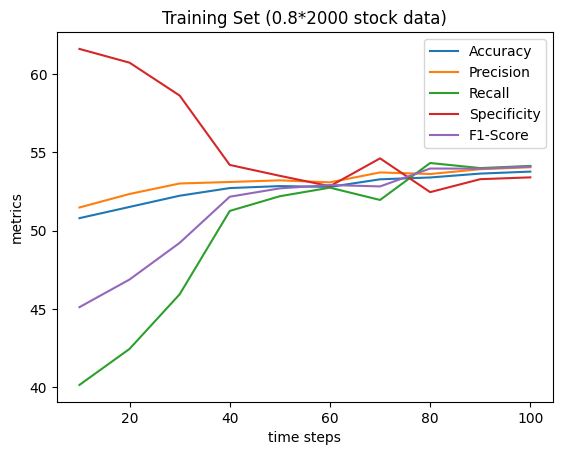

In [27]:
num_stocks=2000
valid_split = 0.2
# train metrics plot
import matplotlib.pyplot as plt
x = train_metrics_dict.keys()
y = train_metrics_dict.values()
plt.plot(x, y, label=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'])
plt.legend()
plt.xlabel('time steps')
plt.ylabel('metrics')
plt.title(f'Training Set ({1-valid_split}*{num_stocks} stock data)')
plt.show()

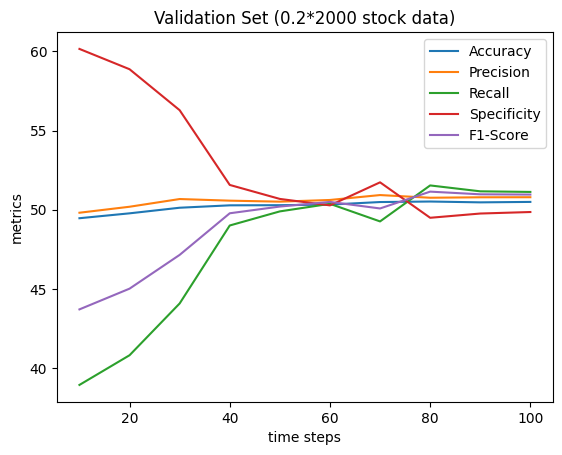

In [28]:
# valid metrics plot
import matplotlib.pyplot as plt
x = valid_metrics_dict.keys()
y = valid_metrics_dict.values()
plt.plot(x, y, label=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'])
plt.legend()
plt.xlabel('time steps')
plt.ylabel('metrics')
plt.title(f'Validation Set ({valid_split}*{num_stocks} stock data)')
plt.show()

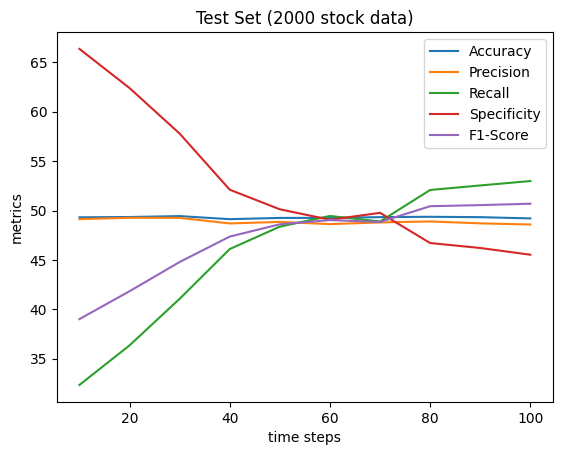

In [29]:
# test metrics plot
import matplotlib.pyplot as plt
x = test_metrics_dict.keys()
y = test_metrics_dict.values()
plt.plot(x, y, label=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'])
plt.legend()
plt.xlabel('time steps')
plt.ylabel('metrics')
plt.title(f'Test Set ({num_stocks} stock data)')
plt.show()